# High vs Low Rated Clusters Comparison
Analyzing the differences between high-rated and low-rated board games by comparing clustering from previous notebooks.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options and styling
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-v0_8-whitegrid')

# Create output directory for plots if it doesn't exist
import os
if not os.path.exists('../plots'):
    os.makedirs('../plots')
if not os.path.exists('../frames'):
    os.makedirs('../frames')

In [17]:
# Load processed data
filtered_df = pd.read_csv('../frames/filtered_games.csv')
all_binary_cols = np.load('../frames/all_binary_cols.npy', allow_pickle=True)
mechanics_cols = np.load('../frames/mechanics_cols.npy', allow_pickle=True)
themes_cols = np.load('../frames/themes_cols.npy', allow_pickle=True)
category_cols = np.load('../frames/category_cols.npy', allow_pickle=True)
subcategories_cols = np.load('../frames/subcategories_cols.npy', allow_pickle=True)

print(f"Loaded {len(filtered_df)} games with {len(all_binary_cols)} binary features")

Loaded 12239 games with 392 binary features


# Rating Distributions

High-rated games (>= 7.0): 3771
Low-rated games (< 6.0): 2791


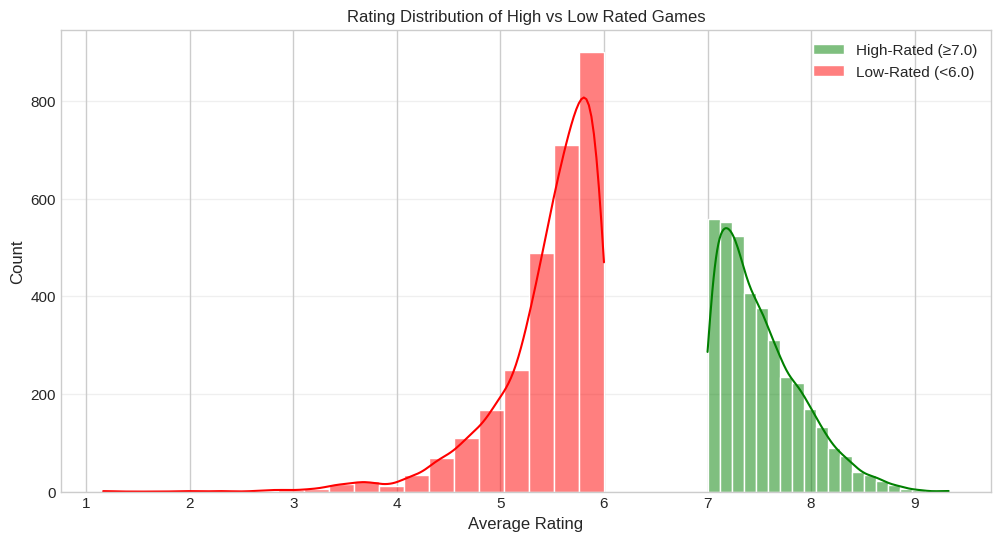

In [18]:
# Define rating thresholds
HIGH_RATING_THRESHOLD = 7.0
LOW_RATING_THRESHOLD = 6.0

# Filter for high and low rated games
high_rated_games = filtered_df[filtered_df['AvgRating'] >= HIGH_RATING_THRESHOLD].copy()
low_rated_games = filtered_df[filtered_df['AvgRating'] < LOW_RATING_THRESHOLD].copy()

print(f"High-rated games (>= {HIGH_RATING_THRESHOLD}): {len(high_rated_games)}")
print(f"Low-rated games (< {LOW_RATING_THRESHOLD}): {len(low_rated_games)}")

# Visualize rating distributions
plt.figure(figsize=(12, 6))
sns.histplot(high_rated_games['AvgRating'], bins=20, kde=True, color='green', alpha=0.5, label=f'High-Rated (≥{HIGH_RATING_THRESHOLD})')
sns.histplot(low_rated_games['AvgRating'], bins=20, kde=True, color='red', alpha=0.5, label=f'Low-Rated (<{LOW_RATING_THRESHOLD})')
plt.title('Rating Distribution of High vs Low Rated Games')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.savefig('../plots/high_low_rating_distribution.png')
plt.show()

# Comparison between High and Low Rating Clusters

In [30]:
high_rated_clusters = pd.read_csv('../frames/high_rated_games_with_clusters.csv')
low_rated_clusters = pd.read_csv('../frames/low_rated_games_with_clusters.csv')
high_cluster_stats = pd.read_csv('../frames/high_rating_cluster_statistics.csv')
low_cluster_stats = pd.read_csv('../frames/low_rating_cluster_statistics.csv')
print(f"Loaded clustering results for {len(high_rated_clusters)} high-rated and {len(low_rated_clusters)} low-rated games")
print(f"Number of high-rated clusters: {high_cluster_stats['HighRatingCluster'].nunique()}")
print(f"Number of low-rated clusters: {low_cluster_stats['LowRatingCluster'].nunique()}")

Loaded clustering results for 3771 high-rated and 2791 low-rated games
Number of high-rated clusters: 5
Number of low-rated clusters: 5


# Compare Cluster Sizes and Ratings

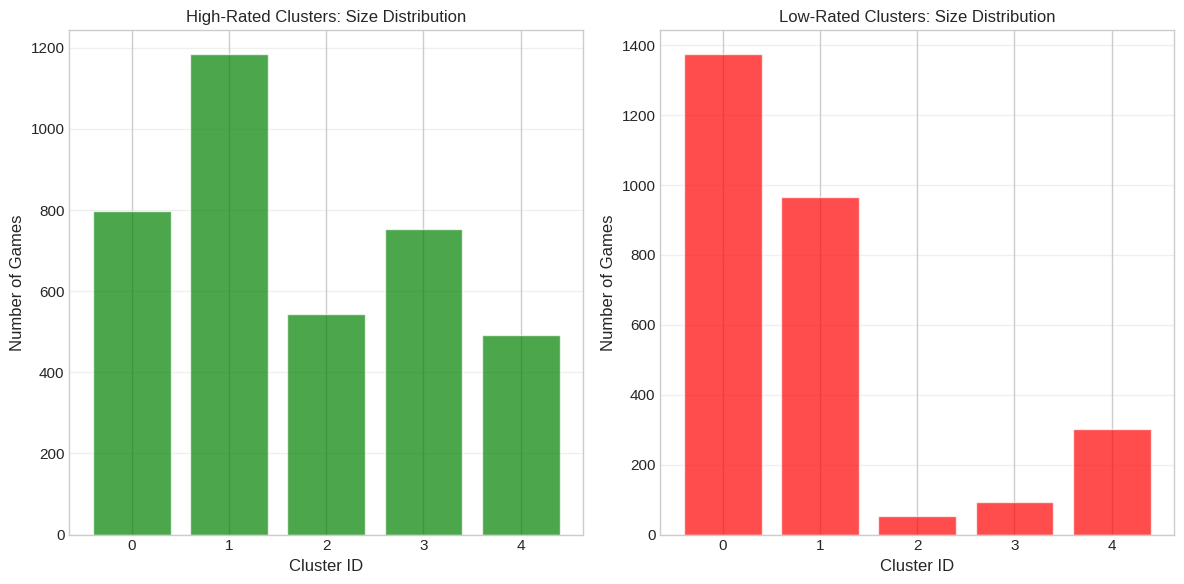

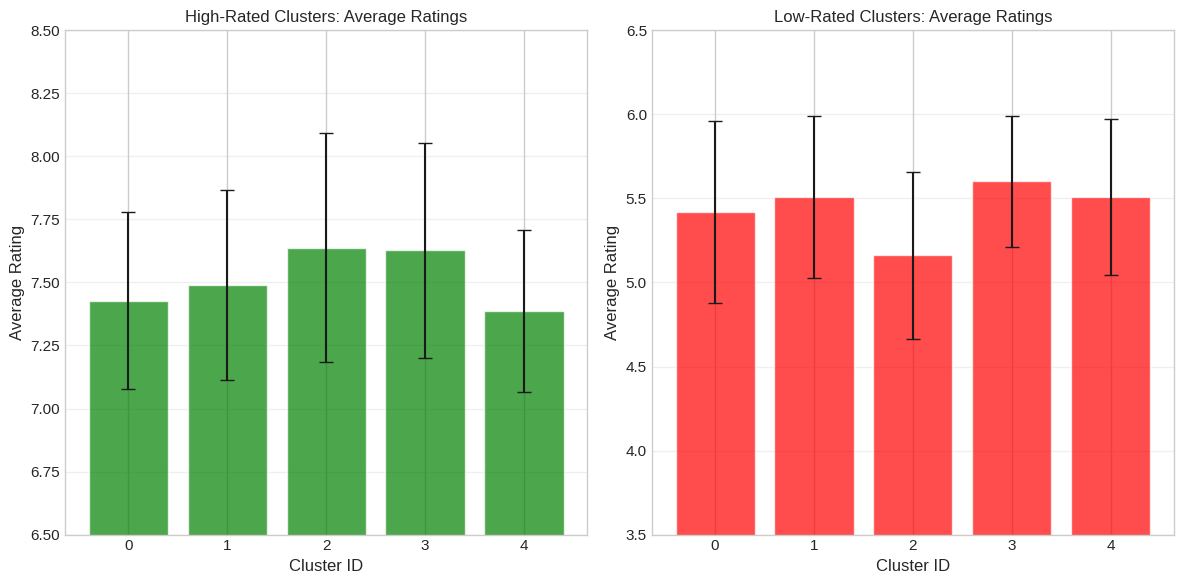

In [32]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
high_cluster_sizes = high_rated_clusters['HighRatingCluster'].value_counts().sort_index()
ax1.bar(high_cluster_sizes.index.astype(str), high_cluster_sizes.values, color='green', alpha=0.7)
ax1.set_title('High-Rated Clusters: Size Distribution')
ax1.set_xlabel('Cluster ID')
ax1.set_ylabel('Number of Games')
ax1.grid(axis='y', alpha=0.3)

ax2 = plt.subplot(1, 2, 2)
low_cluster_sizes = low_rated_clusters['LowRatingCluster'].value_counts().sort_index()
ax2.bar(low_cluster_sizes.index.astype(str), low_cluster_sizes.values, color='red', alpha=0.7)
ax2.set_title('Low-Rated Clusters: Size Distribution')
ax2.set_xlabel('Cluster ID')
ax2.set_ylabel('Number of Games')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../plots/high_low_cluster_sizes.png')
plt.show()

# Compare average ratings of clusters
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
high_avg_ratings = high_cluster_stats.sort_values('HighRatingCluster')
ax1.bar(high_avg_ratings['HighRatingCluster'].astype(str), high_avg_ratings['AvgRating_Mean'], 
        yerr=high_avg_ratings['AvgRating_Std'], capsize=5, color='green', alpha=0.7)
ax1.set_title('High-Rated Clusters: Average Ratings')
ax1.set_xlabel('Cluster ID')
ax1.set_ylabel('Average Rating')
ax1.set_ylim(HIGH_RATING_THRESHOLD - 0.5, 8.5)
ax1.grid(axis='y', alpha=0.3)

ax2 = plt.subplot(1, 2, 2)
low_avg_ratings = low_cluster_stats.sort_values('LowRatingCluster')
ax2.bar(low_avg_ratings['LowRatingCluster'].astype(str), low_avg_ratings['AvgRating_Mean'], 
        yerr=low_avg_ratings['AvgRating_Std'], capsize=5, color='red', alpha=0.7)
ax2.set_title('Low-Rated Clusters: Average Ratings')
ax2.set_xlabel('Cluster ID')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(3.5, LOW_RATING_THRESHOLD + 0.5)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../plots/high_low_cluster_ratings.png')
plt.show()

# Compare popular features' prevalence across clusters

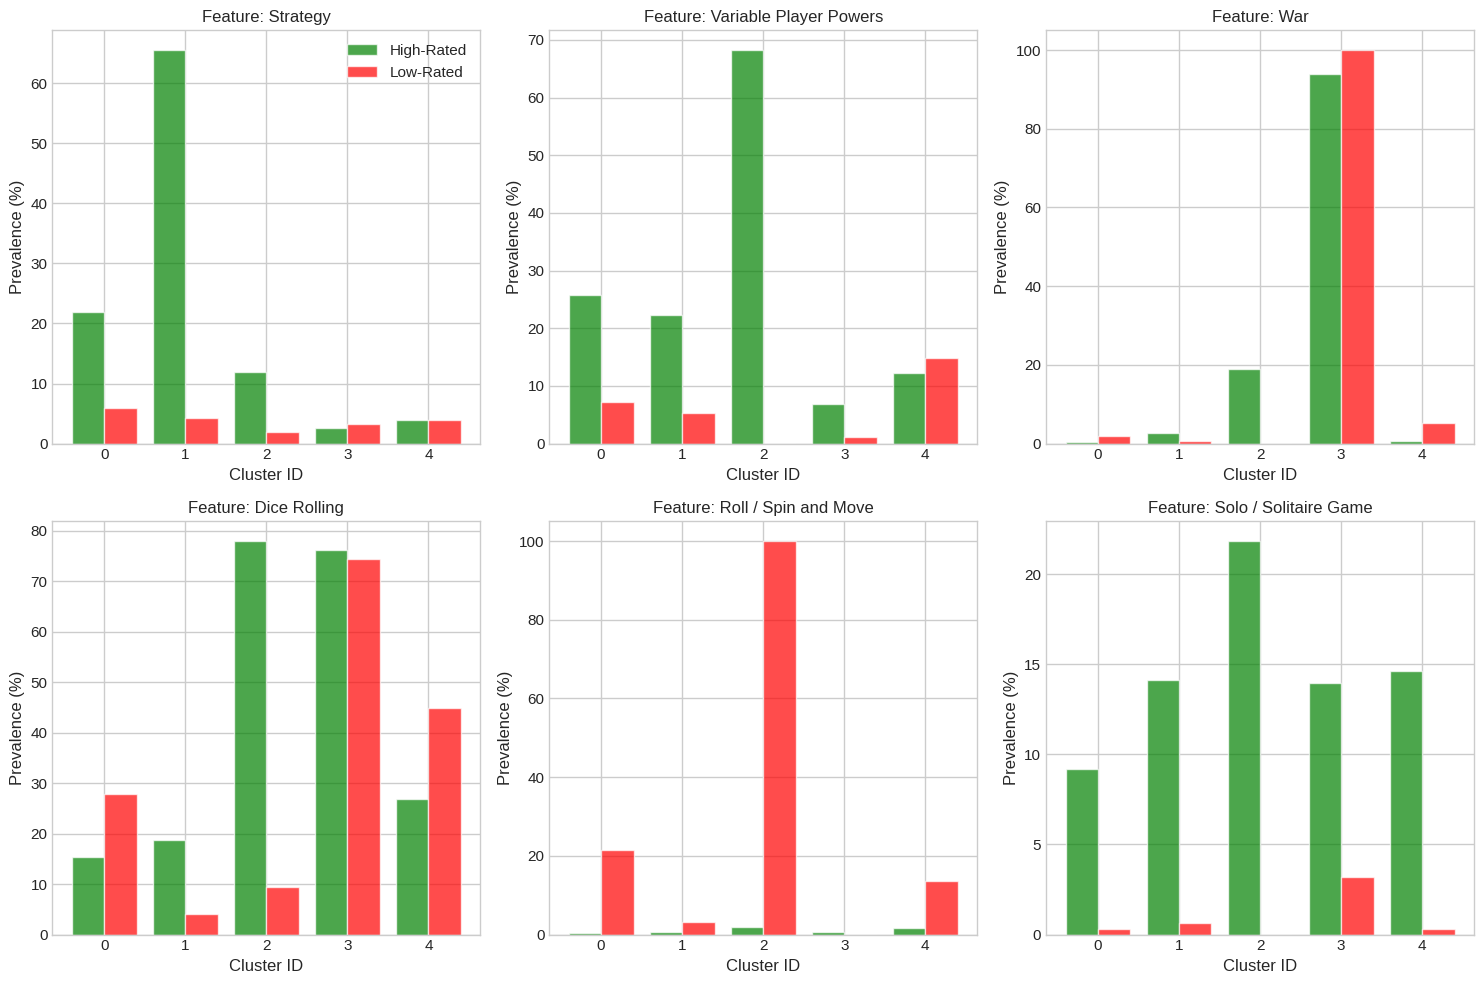

In [33]:
def compare_feature_across_clusters(feature, high_clusters, low_clusters):
    """Compare prevalence of a feature across high and low rated clusters"""
    # Get prevalence in high-rated clusters
    high_prevalence = []
    for cluster_id in sorted(high_clusters['HighRatingCluster'].unique()):
        cluster_df = high_clusters[high_clusters['HighRatingCluster'] == cluster_id]
        high_prevalence.append(cluster_df[feature].mean() * 100)
    
    # Get prevalence in low-rated clusters
    low_prevalence = []
    for cluster_id in sorted(low_clusters['LowRatingCluster'].unique()):
        cluster_df = low_clusters[low_clusters['LowRatingCluster'] == cluster_id]
        low_prevalence.append(cluster_df[feature].mean() * 100)
    
    return high_prevalence, low_prevalence

# Find most distinguishing features between high and low rated games
feature_diffs = {}
for feature in all_binary_cols:
    high_mean = high_rated_games[feature].mean()
    low_mean = low_rated_games[feature].mean()
    feature_diffs[feature] = abs(high_mean - low_mean)

# Get top distinguishing features
top_features = sorted(feature_diffs.items(), key=lambda x: x[1], reverse=True)[:10]
top_feature_names = [f[0] for f in top_features]

# Compare top distinguishing features across clusters
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_feature_names[:6]):  # Plot top 5 features
    feature_name = feature.split(':', 1)[1] if ':' in feature else feature
    high_prevalence, low_prevalence = compare_feature_across_clusters(feature, high_rated_clusters, low_rated_clusters)
    
    ax = plt.subplot(2, 3, i+1)
    
    # Plot high-rated clusters
    high_x = np.arange(len(high_prevalence))
    ax.bar(high_x - 0.2, high_prevalence, width=0.4, label='High-Rated', color='green', alpha=0.7)
    
    # Plot low-rated clusters
    low_x = np.arange(len(low_prevalence))
    ax.bar(low_x + 0.2, low_prevalence, width=0.4, label='Low-Rated', color='red', alpha=0.7)
    
    ax.set_title(f'Feature: {feature_name}')
    ax.set_xlabel('Cluster ID')
    ax.set_ylabel('Prevalence (%)')
    ax.set_xticks(np.arange(max(len(high_prevalence), len(low_prevalence))))
    if i == 0:  # Only add legend to first plot
        ax.legend()
    
plt.tight_layout()
plt.savefig('../plots/feature_prevalence_by_cluster.png')
plt.show()


# Compare feature distribution within each cluster group (high vs low)

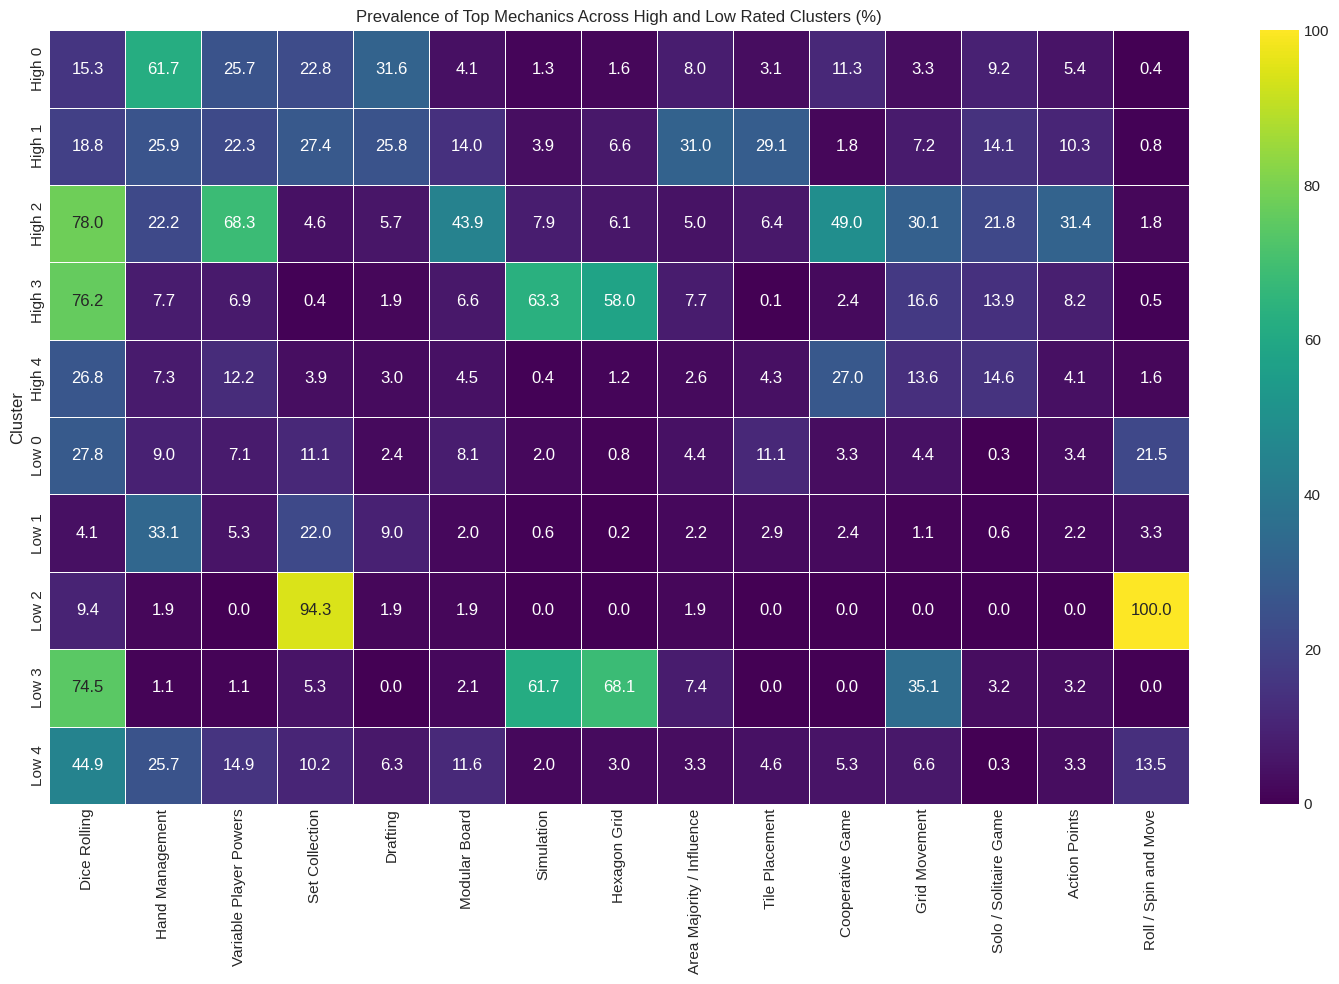

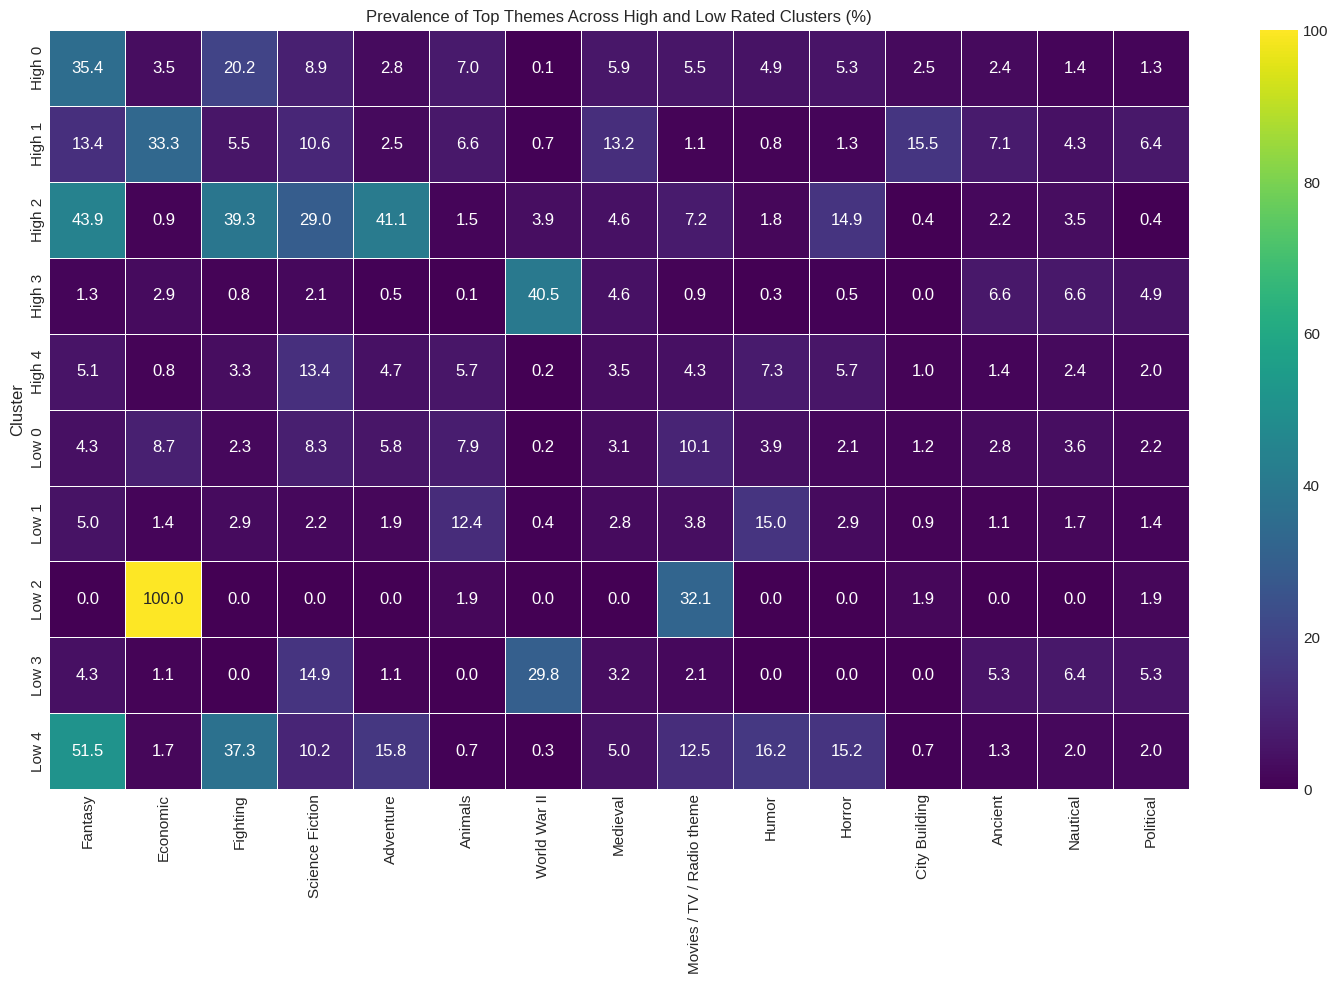

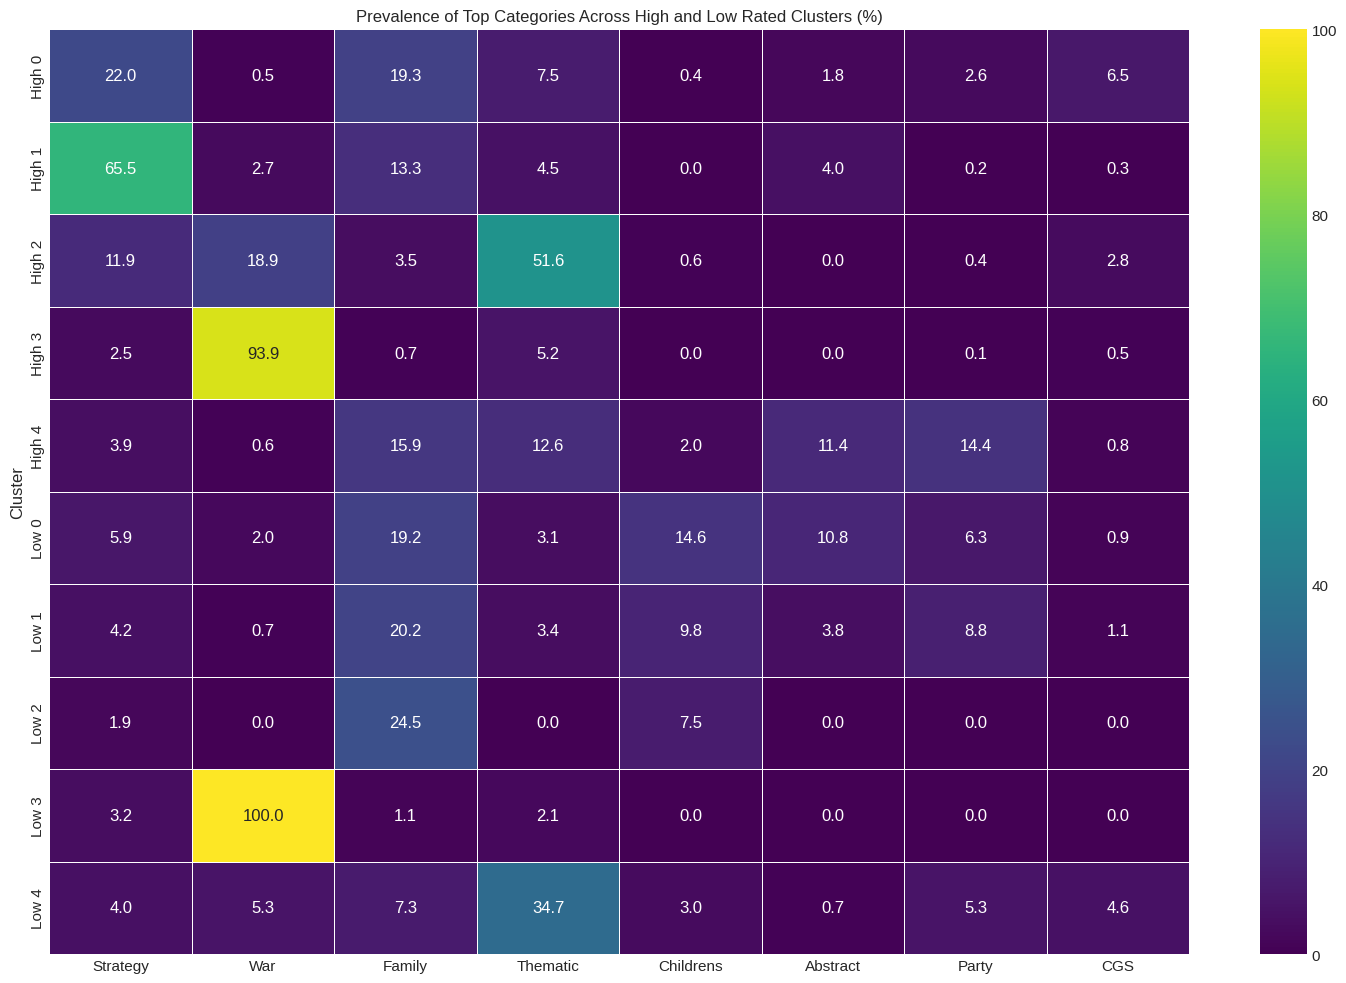

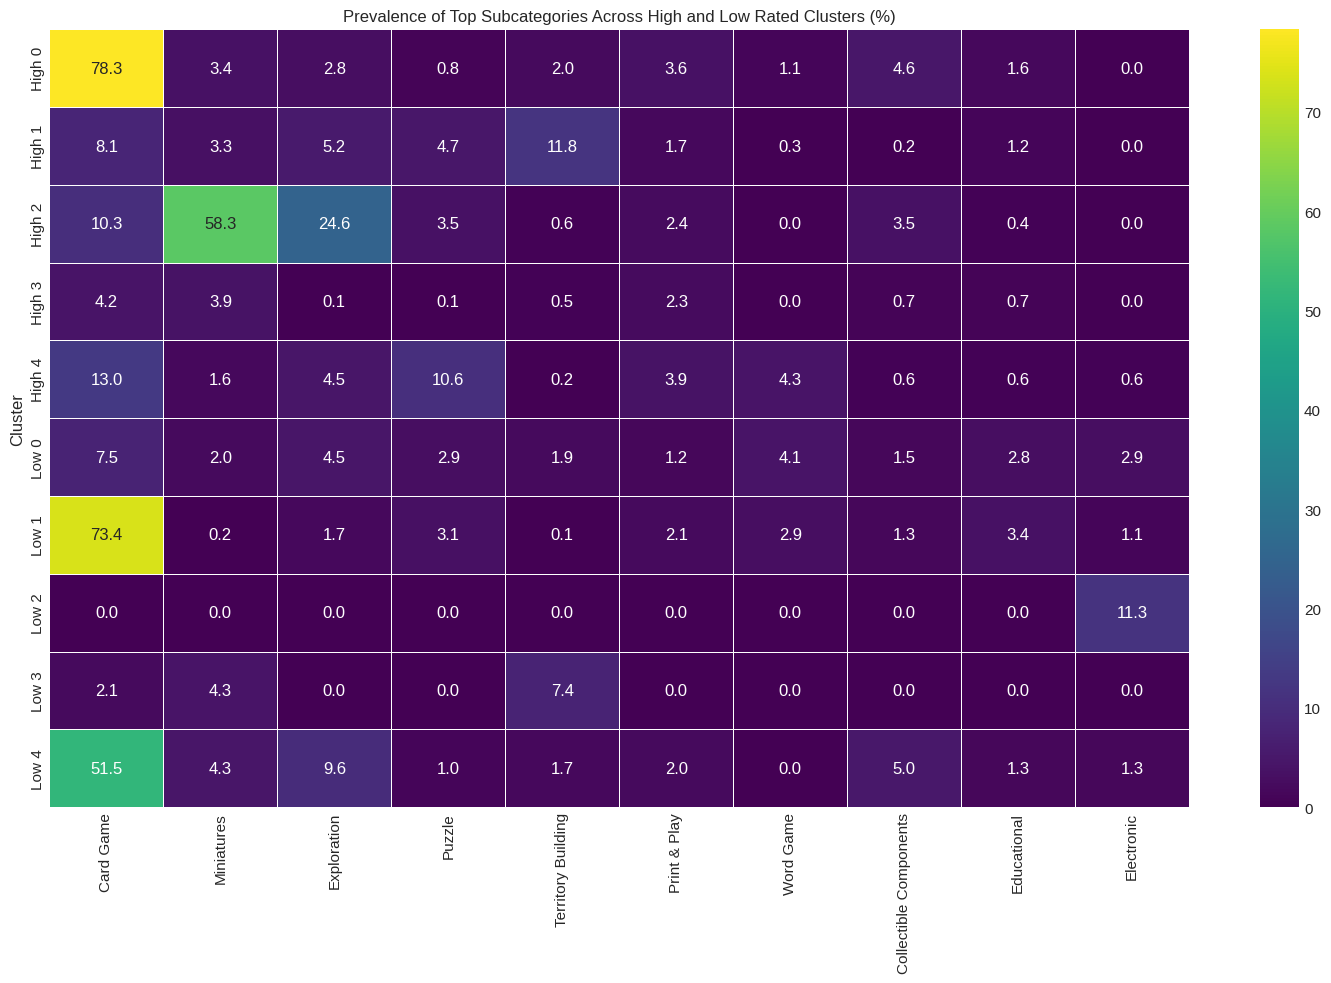

In [34]:
def cluster_feature_heatmap(feature_group, feature_cols, high_clusters, low_clusters, title):
    """Create heatmaps showing feature prevalence in each cluster"""
    # Get top features in this group
    feature_counts = (high_rated_games[feature_cols].sum() + low_rated_games[feature_cols].sum())
    top_features = feature_counts.sort_values(ascending=False).head(15).index
    
    # For each high-rated cluster, get feature prevalence
    high_cluster_data = []
    for cluster_id in sorted(high_clusters['HighRatingCluster'].unique()):
        cluster_df = high_clusters[high_clusters['HighRatingCluster'] == cluster_id]
        cluster_data = {'Cluster': f'High {cluster_id}'}
        for feature in top_features:
            feature_name = feature.split(':', 1)[1] if ':' in feature else feature
            cluster_data[feature_name] = cluster_df[feature].mean() * 100
        high_cluster_data.append(cluster_data)
    
    # For each low-rated cluster, get feature prevalence
    low_cluster_data = []
    for cluster_id in sorted(low_clusters['LowRatingCluster'].unique()):
        cluster_df = low_clusters[low_clusters['LowRatingCluster'] == cluster_id]
        cluster_data = {'Cluster': f'Low {cluster_id}'}
        for feature in top_features:
            feature_name = feature.split(':', 1)[1] if ':' in feature else feature
            cluster_data[feature_name] = cluster_df[feature].mean() * 100
        low_cluster_data.append(cluster_data)
    
    # Combine data and create DataFrame
    all_data = pd.DataFrame(high_cluster_data + low_cluster_data)
    all_data = all_data.set_index('Cluster')
    
    # Create heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(all_data, annot=True, cmap='viridis', fmt='.1f', linewidths=0.5)
    plt.title(f'Prevalence of {title} Across High and Low Rated Clusters (%)')
    plt.tight_layout()
    plt.savefig(f'../plots/{feature_group}_heatmap_by_cluster.png')
    plt.show()
    
    return all_data

# Create heatmaps for each feature group
mechanics_heatmap = cluster_feature_heatmap('mechanics', mechanics_cols, high_rated_clusters, low_rated_clusters, 'Top Mechanics')
themes_heatmap = cluster_feature_heatmap('themes', themes_cols, high_rated_clusters, low_rated_clusters, 'Top Themes')
categories_heatmap = cluster_feature_heatmap('categories', category_cols, high_rated_clusters, low_rated_clusters, 'Top Categories')
subcategories_heatmap = cluster_feature_heatmap('subcategories', subcategories_cols, high_rated_clusters, low_rated_clusters, 'Top Subcategories')

# Find the most similar clusters between high and low rated groups

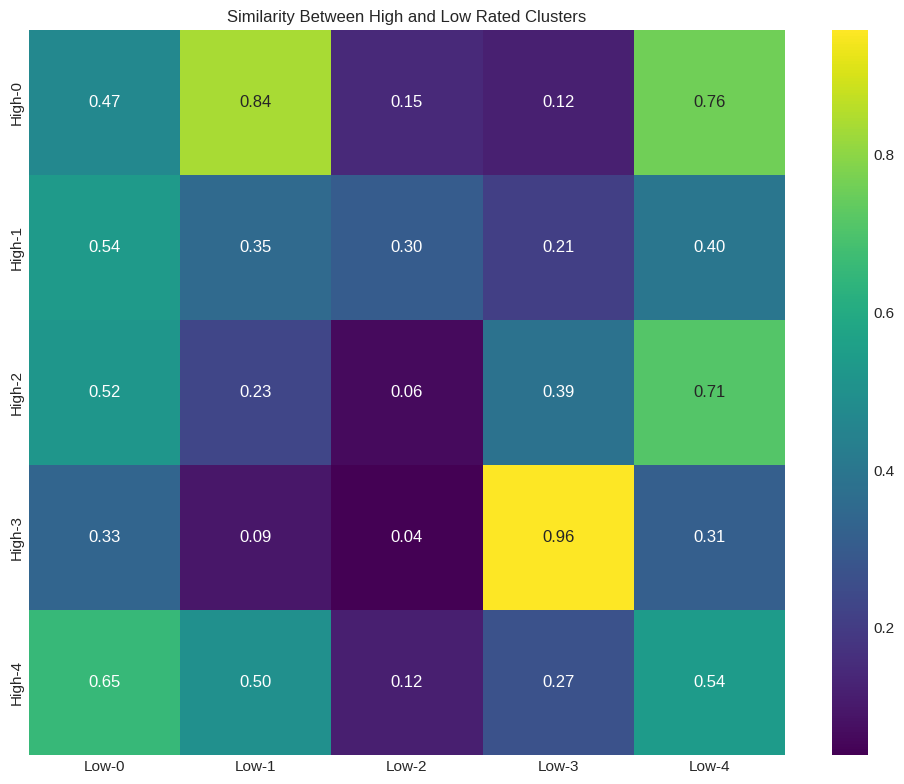

In [38]:
def cluster_similarity(high_cluster_id, low_cluster_id, high_clusters, low_clusters, feature_cols):
    """Calculate similarity between a high-rated and low-rated cluster based on feature vectors"""
    high_cluster_df = high_clusters[high_clusters['HighRatingCluster'] == high_cluster_id]
    low_cluster_df = low_clusters[low_clusters['LowRatingCluster'] == low_cluster_id]
    
    # Get feature vectors
    high_features = high_cluster_df[feature_cols].mean()
    low_features = low_cluster_df[feature_cols].mean()
    
    # Calculate cosine similarity
    dot_product = np.dot(high_features, low_features)
    norm_high = np.linalg.norm(high_features)
    norm_low = np.linalg.norm(low_features)
    similarity = dot_product / (norm_high * norm_low)
    
    return similarity

# Calculate similarity matrix between high and low clusters
similarity_matrix = np.zeros((len(high_cluster_stats), len(low_cluster_stats)))
for i, high_id in enumerate(sorted(high_rated_clusters['HighRatingCluster'].unique())):
    for j, low_id in enumerate(sorted(low_rated_clusters['LowRatingCluster'].unique())):
        similarity_matrix[i, j] = cluster_similarity(high_id, low_id, high_rated_clusters, low_rated_clusters, all_binary_cols)

# Visualize similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='viridis',
    xticklabels=[f'Low-{i}' for i in sorted(low_rated_clusters['LowRatingCluster'].unique())],
    yticklabels=[f'High-{i}' for i in sorted(high_rated_clusters['HighRatingCluster'].unique())]
)
plt.title('Similarity Between High and Low Rated Clusters')
plt.tight_layout()
plt.savefig('../plots/high_low_cluster_similarity.png')
plt.show()

In [24]:
# Find which clusters are most similar
flat_indices = np.argmax(similarity_matrix.flatten())
high_idx, low_idx = np.unravel_index(flat_indices, similarity_matrix.shape)
high_id = sorted(high_rated_clusters['HighRatingCluster'].unique())[high_idx]
low_id = sorted(low_rated_clusters['LowRatingCluster'].unique())[low_idx]

print(f"\nMost similar clusters: High-{high_id} and Low-{low_id}")
print(f"Similarity score: {similarity_matrix[high_idx, low_idx]:.4f}")

# Find which clusters are most different
flat_indices = np.argmin(similarity_matrix.flatten())
high_idx, low_idx = np.unravel_index(flat_indices, similarity_matrix.shape)
high_id = sorted(high_rated_clusters['HighRatingCluster'].unique())[high_idx]
low_id = sorted(low_rated_clusters['LowRatingCluster'].unique())[low_idx]

print(f"\nMost different clusters: High-{high_id} and Low-{low_id}")
print(f"Similarity score: {similarity_matrix[high_idx, low_idx]:.4f}")


Most similar clusters: High-3 and Low-3
Similarity score: 0.9574

Most different clusters: High-3 and Low-2
Similarity score: 0.0388


# Compare Top 3 most Dissimiliar Clusters

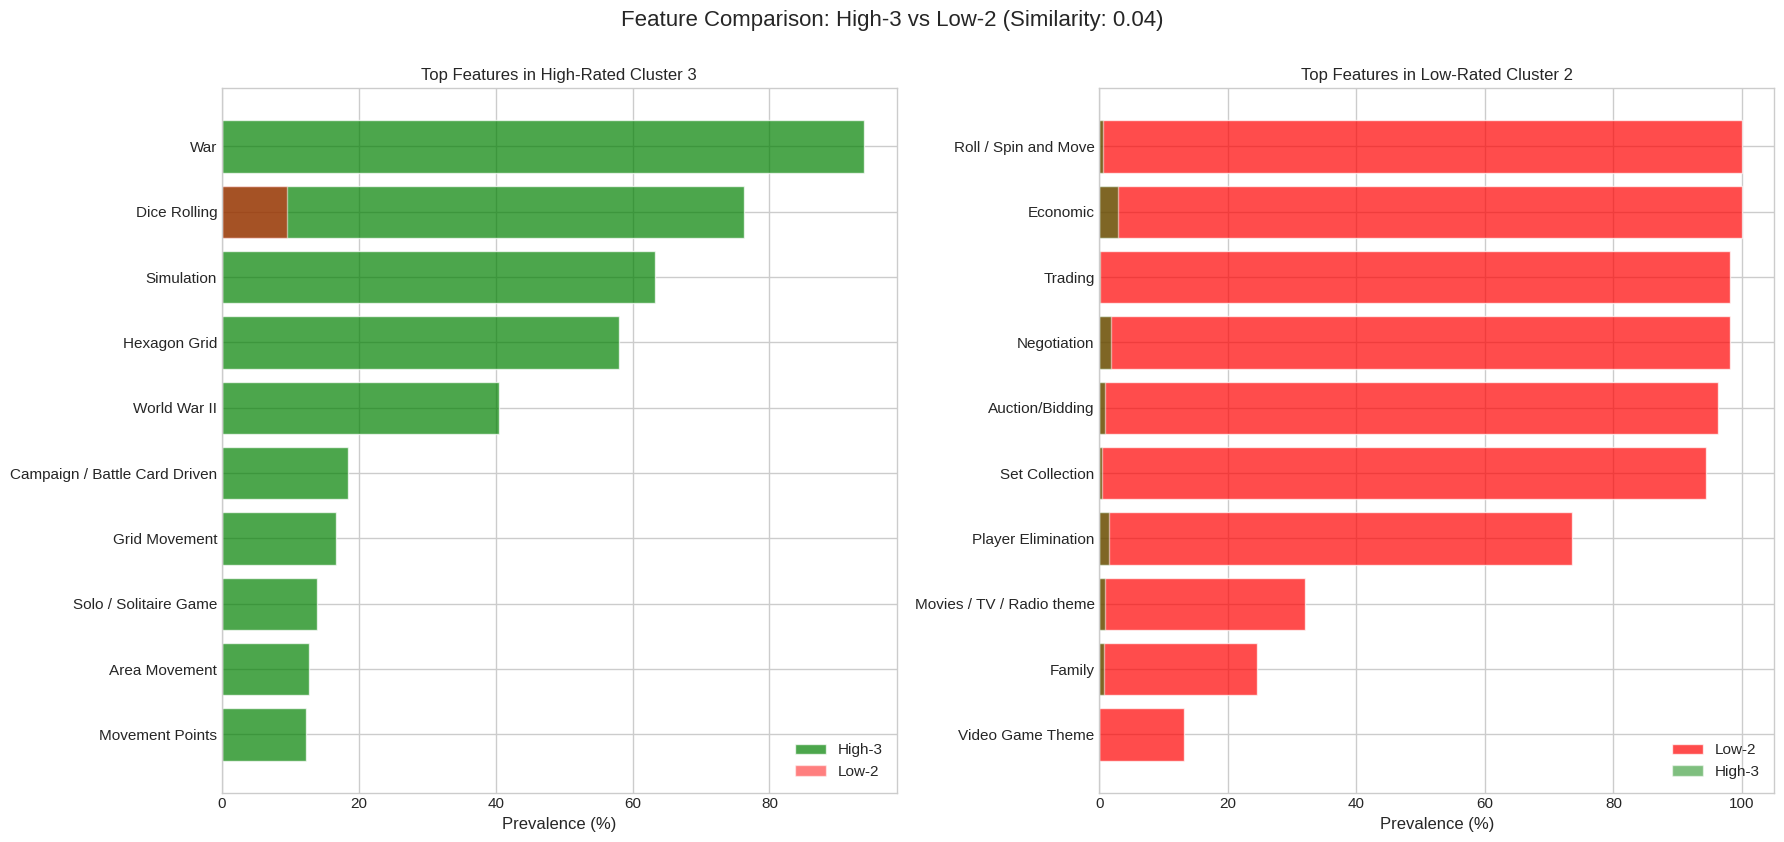


Most differentiating features between High-3 and Low-2:
  Roll / Spin and Move: 0.5% in High-3 vs 100.0% in Low-2
  Trading: 0.1% in High-3 vs 98.1% in Low-2
  Economic: 2.9% in High-3 vs 100.0% in Low-2
  Negotiation: 1.7% in High-3 vs 98.1% in Low-2
  Auction/Bidding: 0.9% in High-3 vs 96.2% in Low-2
  Set Collection: 0.4% in High-3 vs 94.3% in Low-2
  War: 93.9% in High-3 vs 0.0% in Low-2
  Player Elimination: 1.5% in High-3 vs 73.6% in Low-2
  Dice Rolling: 76.2% in High-3 vs 9.4% in Low-2
  Simulation: 63.3% in High-3 vs 0.0% in Low-2


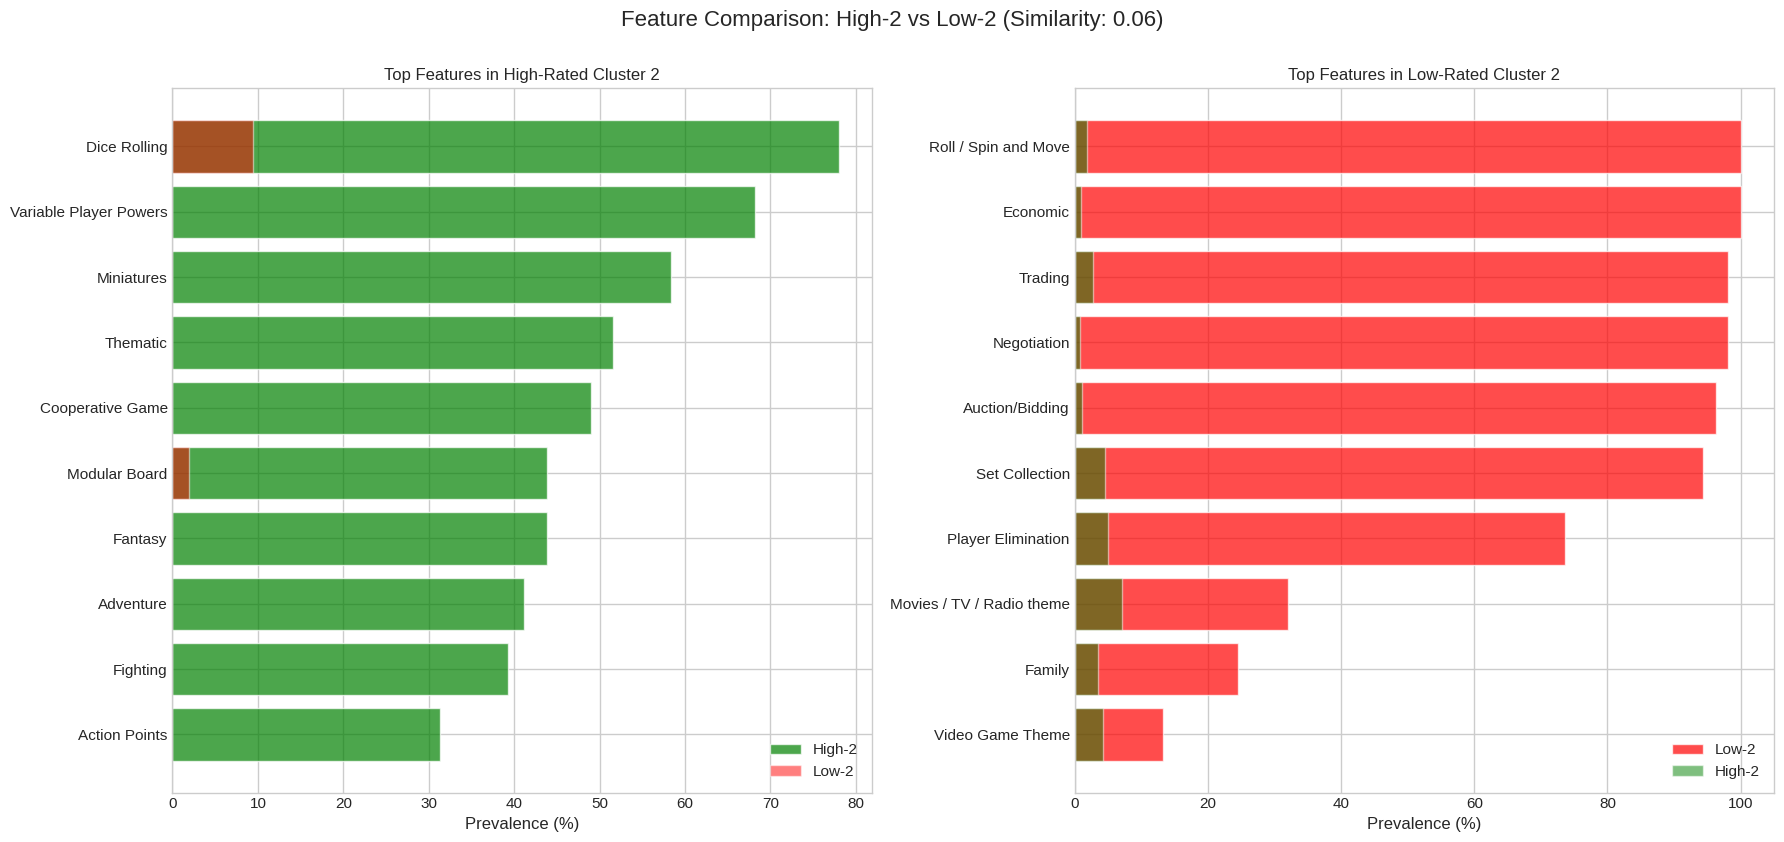


Most differentiating features between High-2 and Low-2:
  Economic: 0.9% in High-2 vs 100.0% in Low-2
  Roll / Spin and Move: 1.8% in High-2 vs 100.0% in Low-2
  Negotiation: 0.7% in High-2 vs 98.1% in Low-2
  Trading: 2.8% in High-2 vs 98.1% in Low-2
  Auction/Bidding: 1.1% in High-2 vs 96.2% in Low-2
  Set Collection: 4.6% in High-2 vs 94.3% in Low-2
  Player Elimination: 5.0% in High-2 vs 73.6% in Low-2
  Dice Rolling: 78.0% in High-2 vs 9.4% in Low-2
  Variable Player Powers: 68.3% in High-2 vs 0.0% in Low-2
  Miniatures: 58.3% in High-2 vs 0.0% in Low-2


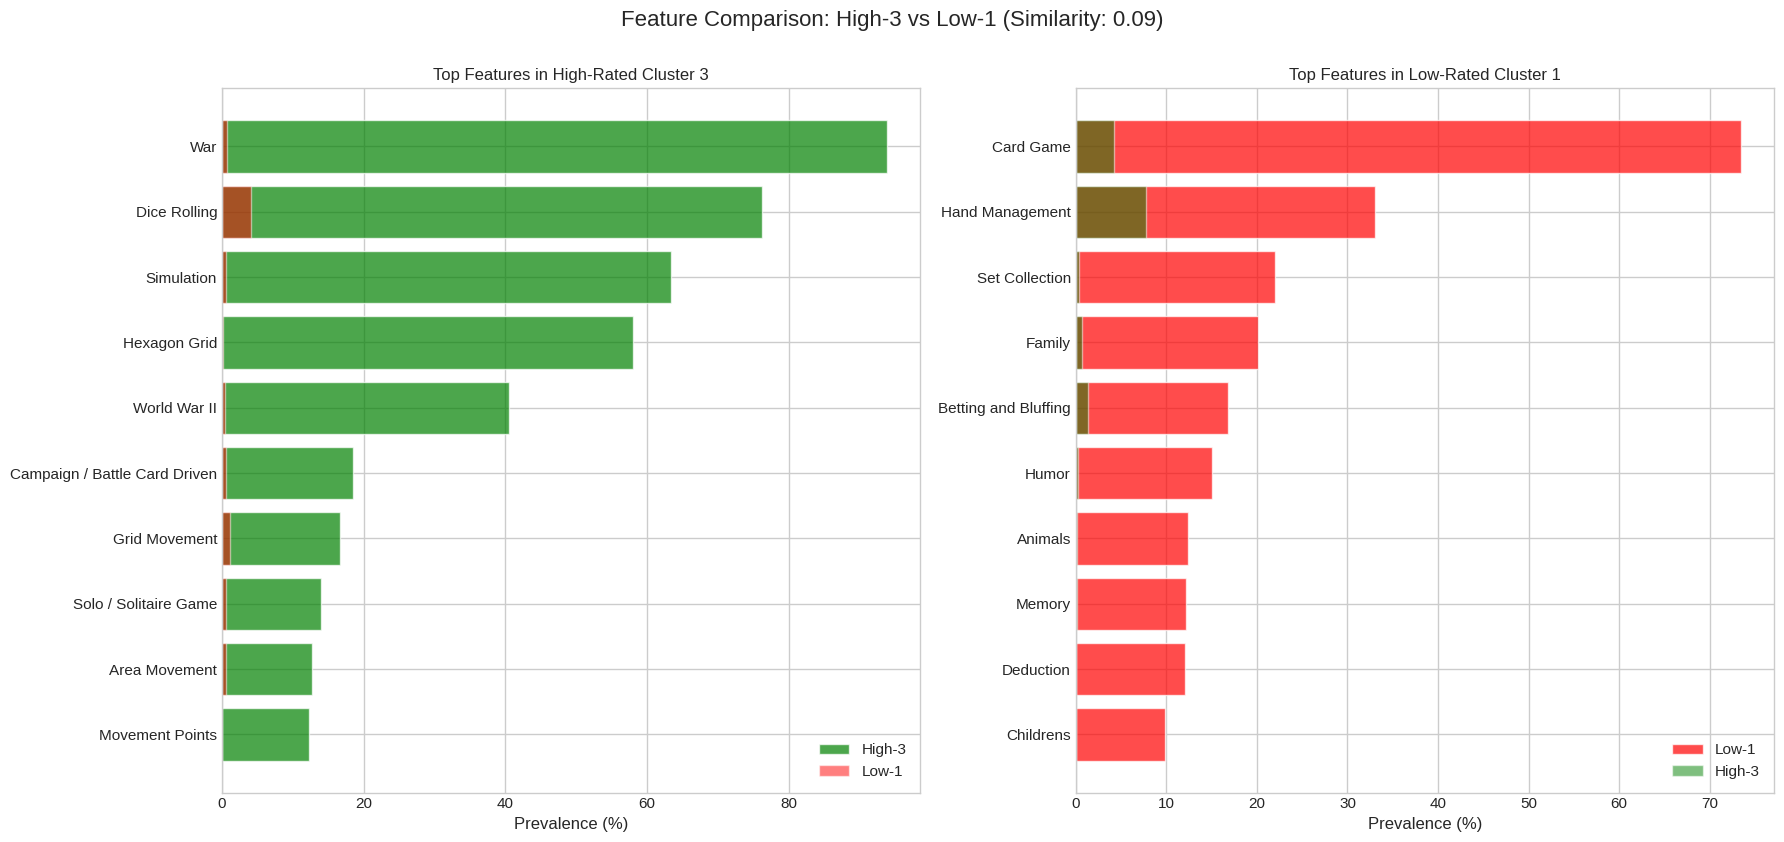


Most differentiating features between High-3 and Low-1:
  War: 93.9% in High-3 vs 0.7% in Low-1
  Dice Rolling: 76.2% in High-3 vs 4.1% in Low-1
  Card Game: 4.2% in High-3 vs 73.4% in Low-1
  Simulation: 63.3% in High-3 vs 0.6% in Low-1
  Hexagon Grid: 58.0% in High-3 vs 0.2% in Low-1
  World War II: 40.5% in High-3 vs 0.4% in Low-1
  Hand Management: 7.7% in High-3 vs 33.1% in Low-1
  Set Collection: 0.4% in High-3 vs 22.0% in Low-1
  Family: 0.7% in High-3 vs 20.2% in Low-1
  Campaign / Battle Card Driven: 18.5% in High-3 vs 0.5% in Low-1


In [35]:
# Function to create comparative visualizations for dissimilar clusters
def compare_dissimilar_clusters(high_id, low_id, high_clusters, low_clusters, feature_cols, n_features=10):
    """
    Create visualization comparing top features between dissimilar high and low rated clusters
    """
    # Get cluster data
    high_cluster_df = high_clusters[high_clusters['HighRatingCluster'] == high_id]
    low_cluster_df = low_clusters[low_clusters['LowRatingCluster'] == low_id]
    
    # Calculate feature prevalence for both clusters
    high_prevalence = high_cluster_df[feature_cols].mean() * 100
    low_prevalence = low_cluster_df[feature_cols].mean() * 100
    
    # Get top features for high-rated cluster
    high_top_features = high_prevalence.sort_values(ascending=False).head(n_features)
    high_top_names = [f.split(':', 1)[1] if ':' in f else f for f in high_top_features.index]
    
    # Get top features for low-rated cluster
    low_top_features = low_prevalence.sort_values(ascending=False).head(n_features)
    low_top_names = [f.split(':', 1)[1] if ':' in f else f for f in low_top_features.index]
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # High-rated cluster top features
    bars1 = ax1.barh(np.arange(len(high_top_names)), high_top_features.values, color='green', alpha=0.7)
    # Add low-rated values for comparison
    low_values_for_high_features = [low_prevalence[feature] for feature in high_top_features.index]
    ax1.barh(np.arange(len(high_top_names)), low_values_for_high_features, color='red', alpha=0.5)
    
    # Customize first plot
    ax1.set_yticks(np.arange(len(high_top_names)))
    ax1.set_yticklabels(high_top_names)
    ax1.invert_yaxis()  # Highest values at the top
    ax1.set_xlabel('Prevalence (%)')
    ax1.set_title(f'Top Features in High-Rated Cluster {high_id}')
    ax1.legend([f'High-{high_id}', f'Low-{low_id}'])
    
    # Low-rated cluster top features
    bars2 = ax2.barh(np.arange(len(low_top_names)), low_top_features.values, color='red', alpha=0.7)
    # Add high-rated values for comparison
    high_values_for_low_features = [high_prevalence[feature] for feature in low_top_features.index]
    ax2.barh(np.arange(len(low_top_names)), high_values_for_low_features, color='green', alpha=0.5)
    
    # Customize second plot
    ax2.set_yticks(np.arange(len(low_top_names)))
    ax2.set_yticklabels(low_top_names)
    ax2.invert_yaxis()  # Highest values at the top
    ax2.set_xlabel('Prevalence (%)')
    ax2.set_title(f'Top Features in Low-Rated Cluster {low_id}')
    ax2.legend([f'Low-{low_id}', f'High-{high_id}'])
    
    plt.tight_layout()
    plt.suptitle(f'Feature Comparison: High-{high_id} vs Low-{low_id} (Similarity: {similarity_matrix[high_id, low_id]:.2f})', 
                y=1.05, fontsize=16)
    plt.savefig(f'../plots/dissimilar_high{high_id}_low{low_id}_comparison.png', bbox_inches='tight')
    plt.show()
    
    # Calculate and print the most differentiating features
    print(f"\nMost differentiating features between High-{high_id} and Low-{low_id}:")
    
    # Calculate absolute differences
    diff_df = pd.DataFrame({
        'Feature': [f.split(':', 1)[1] if ':' in f else f for f in feature_cols],
        'HighPrevalence': high_prevalence,
        'LowPrevalence': low_prevalence,
        'AbsDifference': abs(high_prevalence - low_prevalence)
    })
    
    # Sort by absolute difference
    diff_df = diff_df.sort_values('AbsDifference', ascending=False)
    
    # Print top differentiating features (with at least 15% prevalence in one cluster)
    for _, row in diff_df[(diff_df['HighPrevalence'] > 15) | (diff_df['LowPrevalence'] > 15)].head(10).iterrows():
        print(f"  {row['Feature']}: {row['HighPrevalence']:.1f}% in High-{high_id} vs {row['LowPrevalence']:.1f}% in Low-{low_id}")

# High-3 vs Low-2 (most dissimilar)
compare_dissimilar_clusters(3, 2, high_rated_clusters, low_rated_clusters, all_binary_cols)

# High-2 vs Low-2 (second most dissimilar)
compare_dissimilar_clusters(2, 2, high_rated_clusters, low_rated_clusters, all_binary_cols)

# High-3 vs Low-1 (third most dissimilar)
compare_dissimilar_clusters(3, 1, high_rated_clusters, low_rated_clusters, all_binary_cols)

# Compare the between specific feature types

In [36]:
# Create visuals for specific feature types (mechanics, themes, categories)
def compare_feature_type_between_clusters(high_id, low_id, high_clusters, low_clusters, feature_type_cols, title):
    """Create visualization comparing specific feature types between clusters"""
    # Get cluster data
    high_cluster_df = high_clusters[high_clusters['HighRatingCluster'] == high_id]
    low_cluster_df = low_clusters[low_clusters['LowRatingCluster'] == low_id]
    
    # Calculate feature prevalence
    high_prevalence = high_cluster_df[feature_type_cols].mean() * 100
    low_prevalence = low_cluster_df[feature_type_cols].mean() * 100
    
    # Calculate differences
    diff_df = pd.DataFrame({
        'Feature': [f.split(':', 1)[1] if ':' in f else f for f in feature_type_cols],
        'HighPrevalence': high_prevalence.values,
        'LowPrevalence': low_prevalence.values,
        'Difference': (high_prevalence - low_prevalence).values
    })
    
    # Get features with significant presence or difference
    significant_features = diff_df[
        ((diff_df['HighPrevalence'] > 10) | (diff_df['LowPrevalence'] > 10)) &
        (abs(diff_df['Difference']) > 5)
    ]
    
    # Sort by absolute difference
    significant_features = significant_features.sort_values('Difference')
    
    # If we have features to plot
    if len(significant_features) > 0:
        plt.figure(figsize=(14, max(6, len(significant_features) * 0.4)))
        
        # Create horizontal bar chart
        y_pos = np.arange(len(significant_features))
        plt.barh(y_pos - 0.2, significant_features['HighPrevalence'], height=0.4, 
                label=f'High-{high_id}', color='green', alpha=0.7)
        plt.barh(y_pos + 0.2, significant_features['LowPrevalence'], height=0.4, 
                label=f'Low-{low_id}', color='red', alpha=0.7)
        
        plt.yticks(y_pos, significant_features['Feature'])
        plt.xlabel('Prevalence (%)')
        plt.title(f'{title} Comparison: High-{high_id} vs Low-{low_id}')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'../plots/dissimilar_high{high_id}_low{low_id}_{title.lower().replace(" ", "_")}.png')
        plt.show()
    else:
        print(f"No significant differences in {title} between High-{high_id} and Low-{low_id}")


----- DETAILED FEATURE TYPE COMPARISONS FOR MOST DISSIMILAR CLUSTERS -----


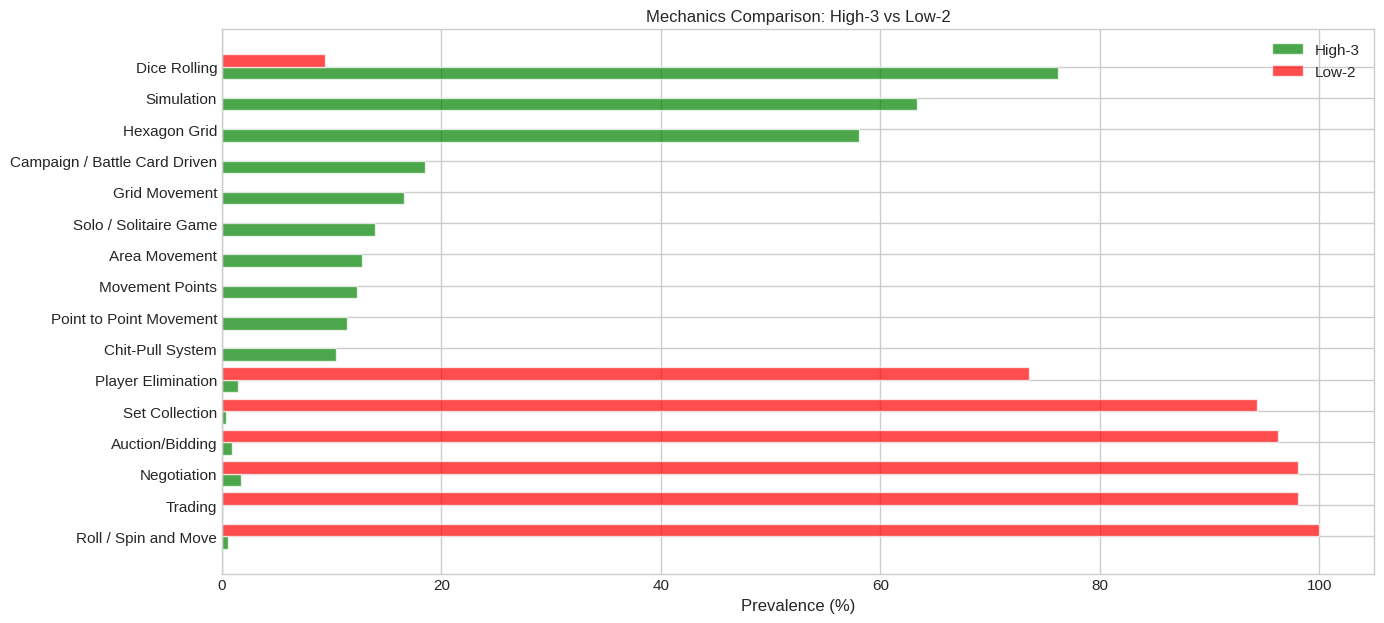

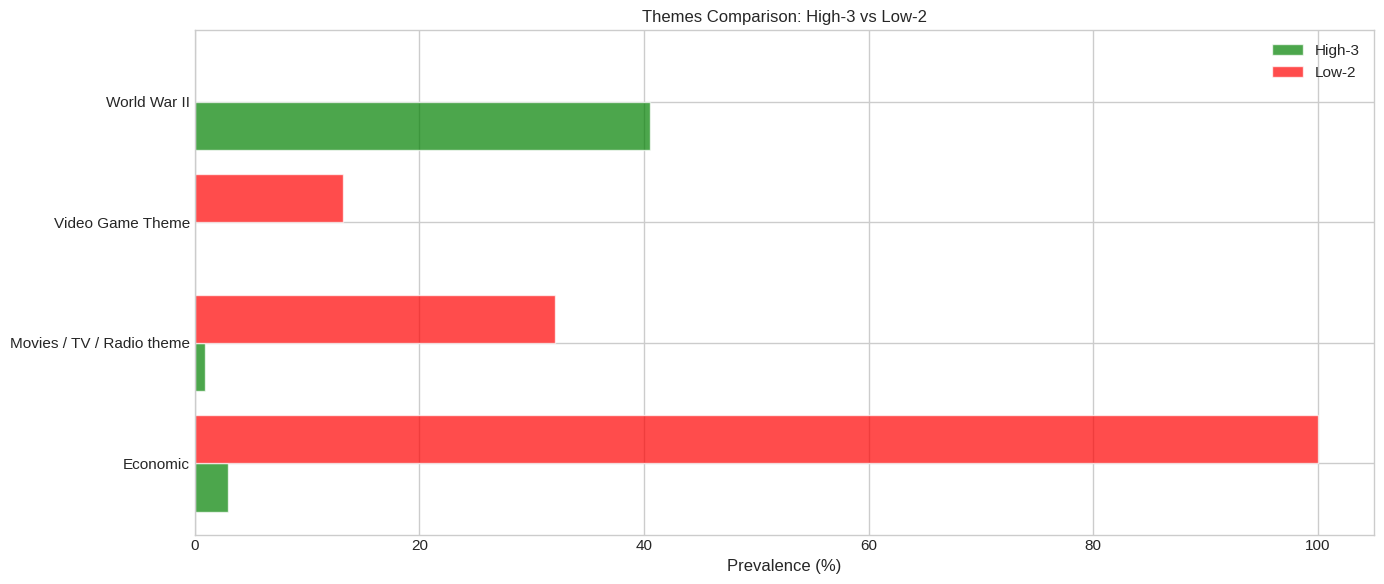

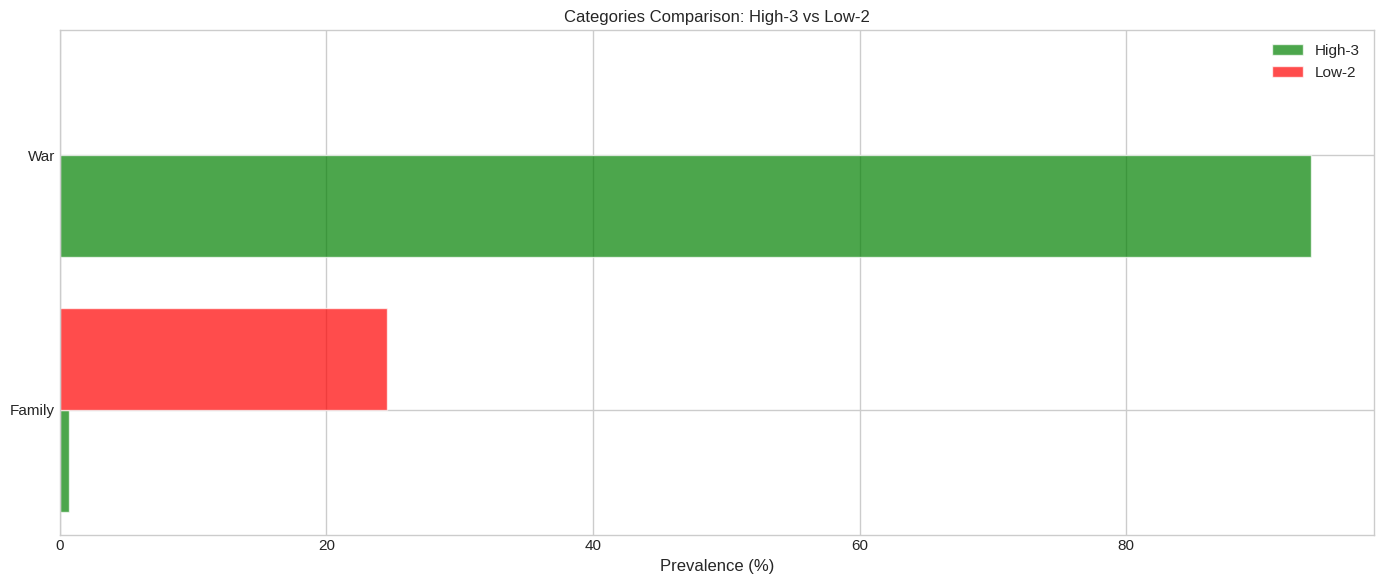

In [37]:
# High-3 vs Low-2 (most dissimilar)
print("\n----- DETAILED FEATURE TYPE COMPARISONS FOR MOST DISSIMILAR CLUSTERS -----")
compare_feature_type_between_clusters(3, 2, high_rated_clusters, low_rated_clusters, mechanics_cols, "Mechanics")
compare_feature_type_between_clusters(3, 2, high_rated_clusters, low_rated_clusters, themes_cols, "Themes")
compare_feature_type_between_clusters(3, 2, high_rated_clusters, low_rated_clusters, category_cols, "Categories")


----- DETAILED FEATURE TYPE COMPARISONS FOR MOST DISSIMILAR CLUSTERS -----


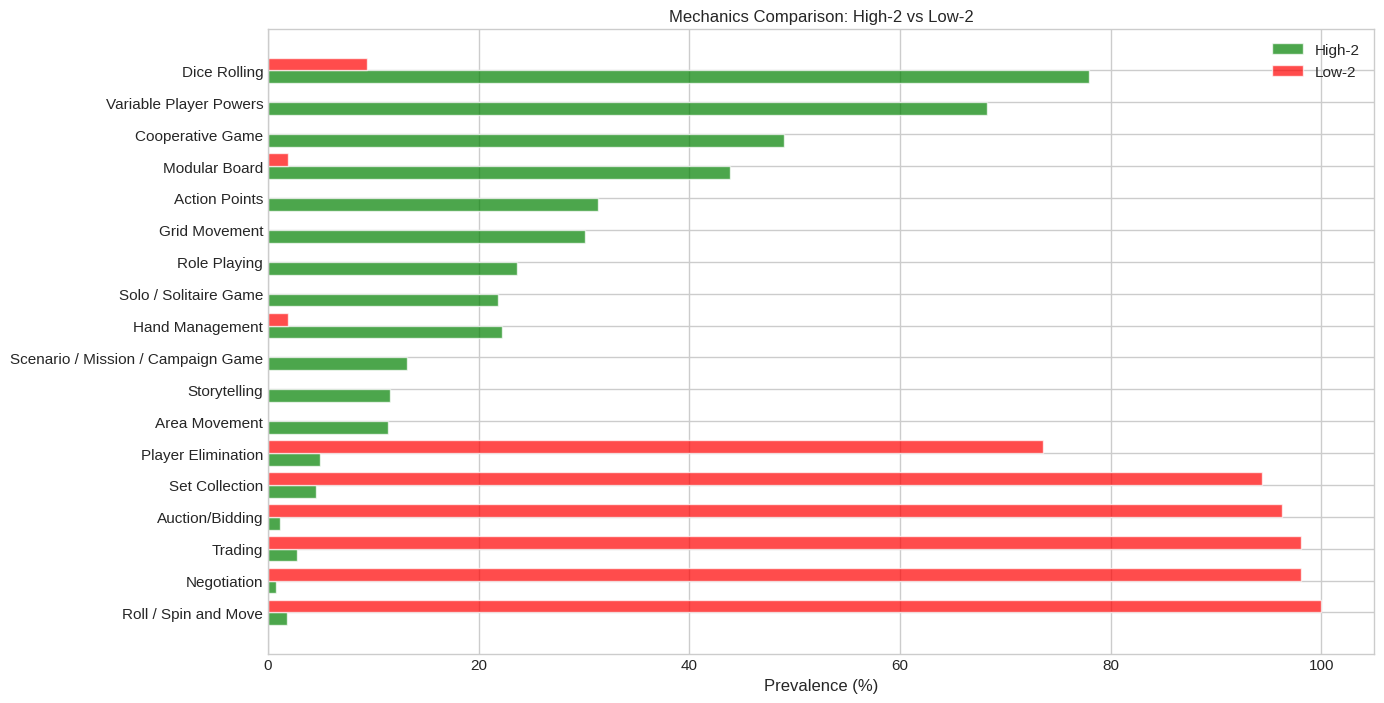

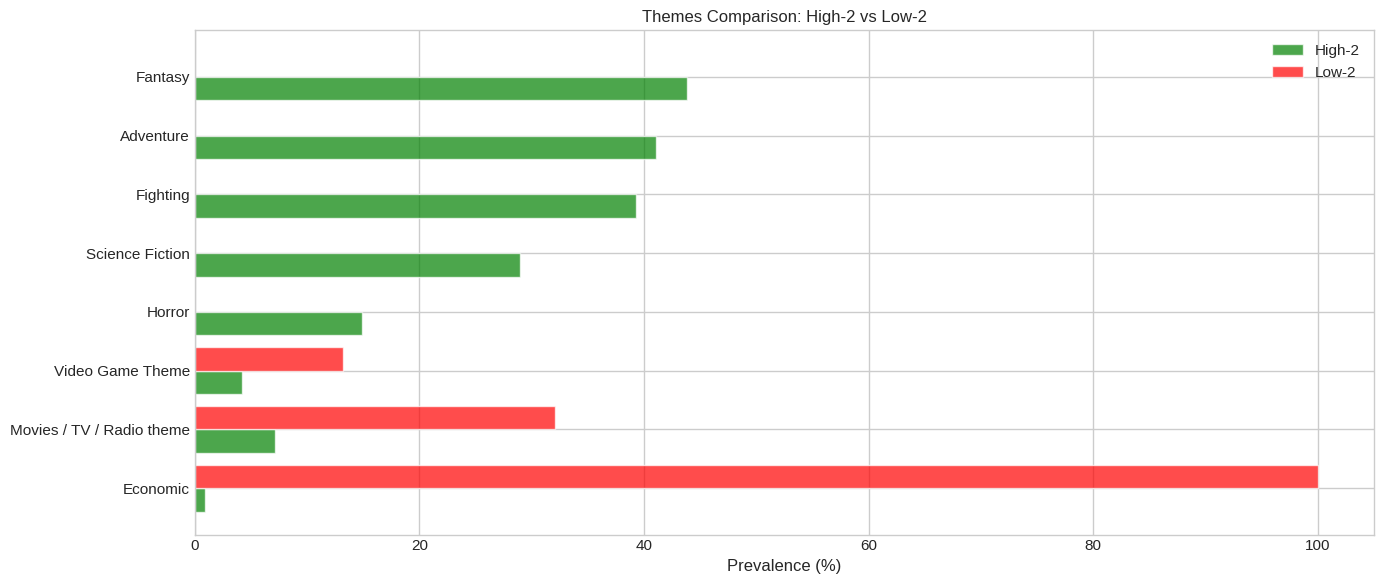

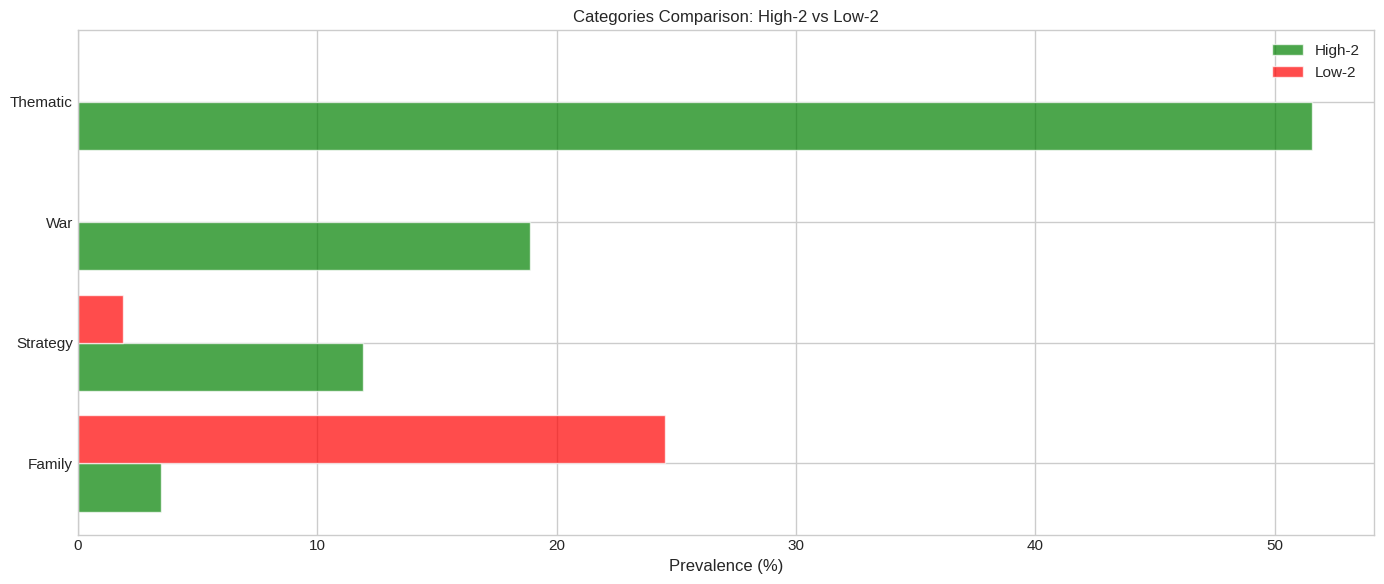

In [28]:
# High-2 vs Low-2 (second most dissimilar)
compare_feature_type_between_clusters(2, 2, high_rated_clusters, low_rated_clusters, mechanics_cols, "Mechanics")
compare_feature_type_between_clusters(2, 2, high_rated_clusters, low_rated_clusters, themes_cols, "Themes")
compare_feature_type_between_clusters(2, 2, high_rated_clusters, low_rated_clusters, category_cols, "Categories")


----- DETAILED FEATURE TYPE COMPARISONS FOR MOST DISSIMILAR CLUSTERS -----


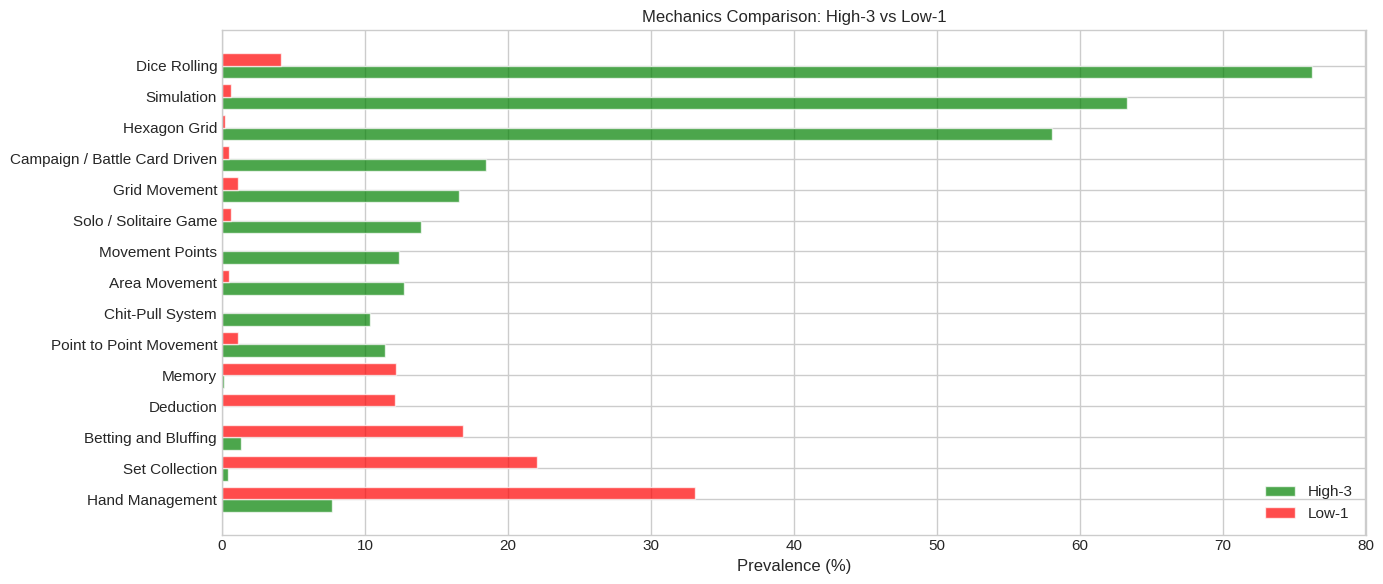

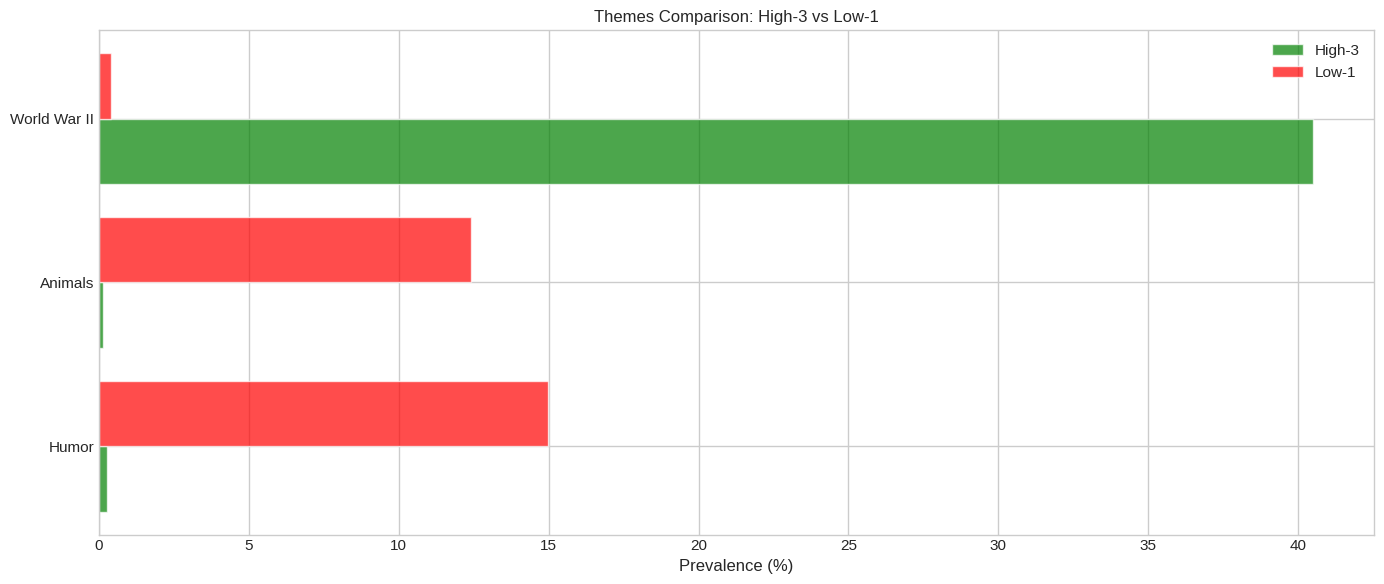

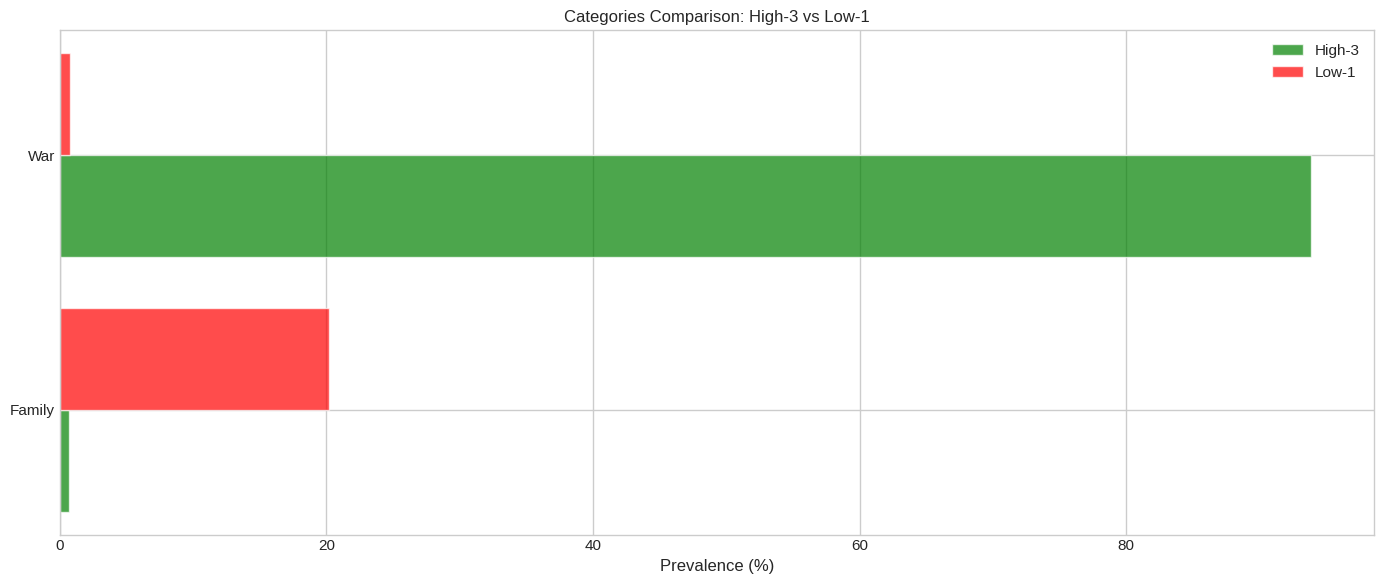

In [29]:
# High-3 vs Low-1 (third most dissimilar)
compare_feature_type_between_clusters(3, 1, high_rated_clusters, low_rated_clusters, mechanics_cols, "Mechanics")
compare_feature_type_between_clusters(3, 1, high_rated_clusters, low_rated_clusters, themes_cols, "Themes")
compare_feature_type_between_clusters(3, 1, high_rated_clusters, low_rated_clusters, category_cols, "Categories")